# Import 

In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [ ]:

df = pd.read_csv('/content/nyflights.csv', index_col=0)
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [ ]:
df.sample(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
212590,2013,5,21,1604.0,1608,-4.0,1739.0,1815,-36.0,9E,3412,N927XJ,JFK,RDU,65.0,427,16,8,2013-05-21 16:00:00
318161,2013,9,10,2007.0,2015,-8.0,2116.0,2144,-28.0,9E,3899,N8942A,JFK,BWI,33.0,184,20,15,2013-09-10 20:00:00
242049,2013,6,22,611.0,615,-4.0,901.0,910,-9.0,AA,1895,N3HGAA,EWR,MIA,147.0,1085,6,15,2013-06-22 06:00:00
115873,2013,2,6,1113.0,1129,-16.0,1343.0,1418,-35.0,B6,523,N588JB,EWR,MCO,129.0,937,11,29,2013-02-06 11:00:00
313890,2013,9,6,802.0,807,-5.0,948.0,959,-11.0,EV,4691,N12924,EWR,DAY,78.0,533,8,7,2013-09-06 08:00:00


In [ ]:
df.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00
336776,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00


Data Dictionary avalible in [Kaggle]('https://www.kaggle.com/lampubhutia/nyc-flight-delay')



In [ ]:
df.shape

(336776, 19)

In [ ]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [ ]:
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [ ]:
pd.DataFrame(df.isna().sum(axis=0)).sort_values(by=0, ascending=False)/df.shape[0]*100

,0
arr_delay,2.800081
air_time,2.800081
arr_time,2.587180
dep_time,2.451184
dep_delay,2.451184
tailnum,0.745896
year,0.000000
origin,0.000000
minute,0.000000
hour,0.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

year                 1
month               12
day                 31
dep_time          1318
sched_dep_time    1021
dep_delay          527
arr_time          1411
sched_arr_time    1163
arr_delay          577
carrier             16
flight            3844
tailnum           4043
origin               3
dest               105
air_time           509
distance           214
hour                20
minute              60
time_hour         6936
dtype: int64

In [ ]:
print(set(df['carrier']))

{'US', 'HA', 'AS', 'MQ', 'B6', 'AA', 'F9', 'VX', 'EV', 'FL', '9E', 'UA', 'WN', 'YV', 'OO', 'DL'}


In [ ]:
df.describe(percentiles=[0.01, .1, .15, .20, .25, .30, .45, .5, .70, .75, .85, .9,.99])

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
1%,2013.0,1.000000,1.000000,551.000000,600.000000,-12.000000,22.000000,40.000000,-44.000000,11.000000,33.000000,169.000000,6.000000,0.000000
10%,2013.0,2.000000,4.000000,703.000000,705.000000,-7.000000,853.000000,917.000000,-26.000000,209.000000,47.000000,214.000000,7.000000,0.000000
15%,2013.0,2.000000,5.000000,754.000000,759.000000,-6.000000,944.000000,1007.000000,-22.000000,329.000000,56.000000,292.000000,7.000000,0.000000
20%,2013.0,3.000000,7.000000,827.000000,830.000000,-6.000000,1023.000000,1040.000000,-19.000000,421.000000,71.000000,427.000000,8.000000,5.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
30%,2013.0,4.000000,10.000000,1001.000000,1000.000000,-4.000000,1154.000000,1214.000000,-14.000000,706.000000,93.000000,544.000000,10.000000,11.000000


In [ ]:
df.describe(include='object')

,carrier,tailnum,origin,dest,time_hour
count,336776,334264,336776,336776,336776
unique,16,4043,3,105,6936
top,UA,N725MQ,EWR,ORD,2013-09-13 08:00:00
freq,58665,575,120835,17283,94


## Reslicing the dataset

In [ ]:
df = df[['flight',  'year', 'month', 'day', 'hour', 'minute', 'time_hour', 'origin', 'dest','distance' ,'air_time',  'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'tailnum']]

In [ ]:
df.head()

,flight,year,month,day,hour,minute,time_hour,origin,dest,distance,air_time,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,tailnum
1,1545,2013,1,1,5,15,2013-01-01 05:00:00,EWR,IAH,1400,227.0,517.0,515,2.0,830.0,819,11.0,UA,N14228
2,1714,2013,1,1,5,29,2013-01-01 05:00:00,LGA,IAH,1416,227.0,533.0,529,4.0,850.0,830,20.0,UA,N24211
3,1141,2013,1,1,5,40,2013-01-01 05:00:00,JFK,MIA,1089,160.0,542.0,540,2.0,923.0,850,33.0,AA,N619AA
4,725,2013,1,1,5,45,2013-01-01 05:00:00,JFK,BQN,1576,183.0,544.0,545,-1.0,1004.0,1022,-18.0,B6,N804JB
5,461,2013,1,1,6,0,2013-01-01 06:00:00,LGA,ATL,762,116.0,554.0,600,-6.0,812.0,837,-25.0,DL,N668DN


In [ ]:
df_corr = df.corr()
df_corr

,year,month,day,hour,minute,distance,air_time,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.002942,-0.005227,0.015528,0.021636,0.010924,-0.003932,-0.004573,-0.020057,-0.002520,-0.004173,-0.017382,-0.000834
day,NaN,0.002942,1.000000,-0.000055,0.000987,0.003041,0.002236,-0.000467,-0.000014,0.000420,-0.005537,-0.002403,-0.000319,-0.001791
hour,NaN,-0.005227,-0.000055,1.000000,0.041768,-0.018860,-0.016277,0.953306,0.999148,0.198226,0.642651,0.783283,0.173456,0.035838
minute,NaN,0.015528,0.000987,0.041768,1.000000,0.019780,0.017032,0.091577,0.082960,0.028441,0.040969,0.050321,0.021522,0.018137
distance,NaN,0.021636,0.003041,-0.018860,0.019780,1.000000,0.990650,-0.013998,-0.017995,-0.021671,0.046991,0.068726,-0.061868,-0.484165
air_time,NaN,0.010924,0.002236,-0.016277,0.017032,0.990650,1.000000,-0.014619,-0.015532,-0.022405,0.054296,0.078918,-0.035297,-0.472838
dep_time,NaN,-0.003932,-0.000467,0.953306,0.091577,-0.013998,-0.014619,1.000000,0.954617,0.260231,0.660779,0.784682,0.232306,0.041957
sched_dep_time,NaN,-0.004573,-0.000014,0.999148,0.082960,-0.017995,-0.015532,0.954617,1.000000,0.198887,0.642680,0.783342,0.173896,0.036495
dep_delay,NaN,-0.020057,0.000420,0.198226,0.028441,-0.021671,-0.022405,0.260231,0.198887,1.000000,0.028729,0.160488,0.914803,0.054734


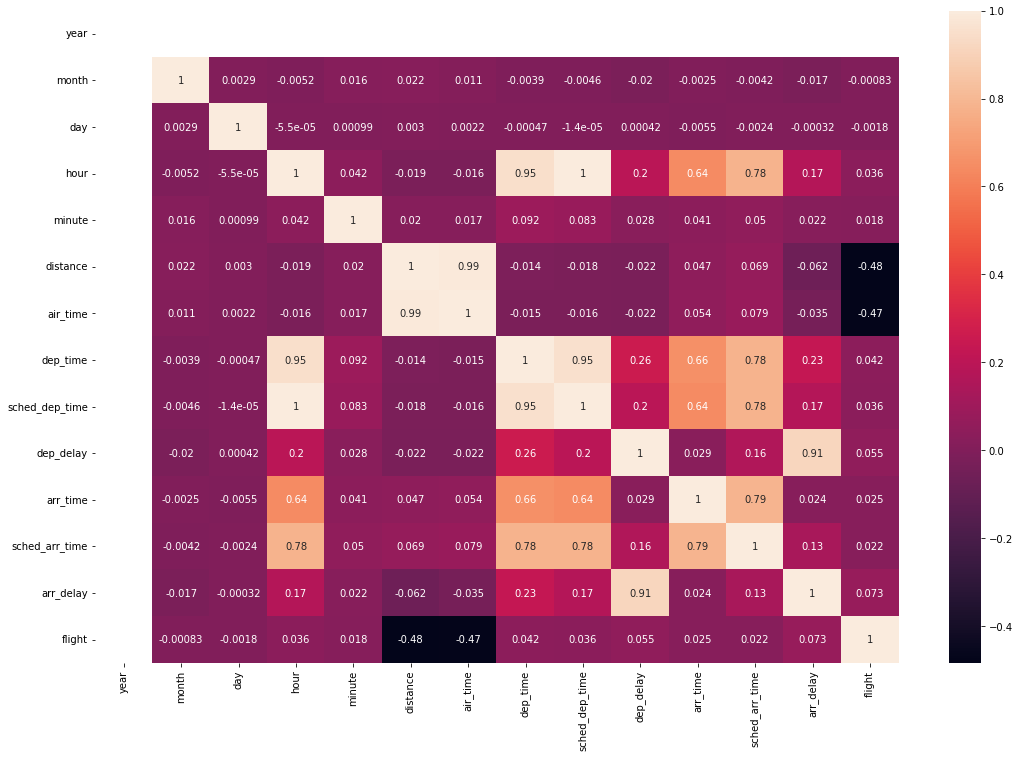

In [ ]:
fig =  fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df_corr, annot=True)

In [ ]:
df.groupby('origin')['dep_delay'].max().sort_values(ascending=False)

origin
JFK    1301.0
EWR    1126.0
LGA     911.0
Name: dep_delay, dtype: float64

In [ ]:
df.groupby('dest')['dep_delay'].max().sort_values(ascending=False)

dest
HNL    1301.0
CMH    1137.0
ORD    1126.0
SFO    1014.0
CVG    1005.0
        ...  
HDN      46.0
EYW      40.0
PSP      10.0
LEX      -9.0
LGA       NaN
Name: dep_delay, Length: 105, dtype: float64

# Machine Learning

After a several steps we finally get here! Now the data is ready to train toe models, one for the departure and other to the arrival delay. 

In [ ]:
fly = df[['dep_delay', 'arr_delay', 'distance', 'dep_time' , "air_time", "arr_time"]]

In [ ]:
fly = fly.dropna()

In [ ]:
fly.distance = fly.distance.astype(float)

,Decision Tree,Random Forest,Extra Tree,Ada Boost,Gradient Boost,Redes Neurais
0,8.257487,10.083921,5.514679,10.220826,8.212896,6.225863
1,181.474204,336.426778,82.219173,220.462550,171.286648,91.111383
2,0.885258,0.787285,0.948015,0.860606,0.891699,0.942392


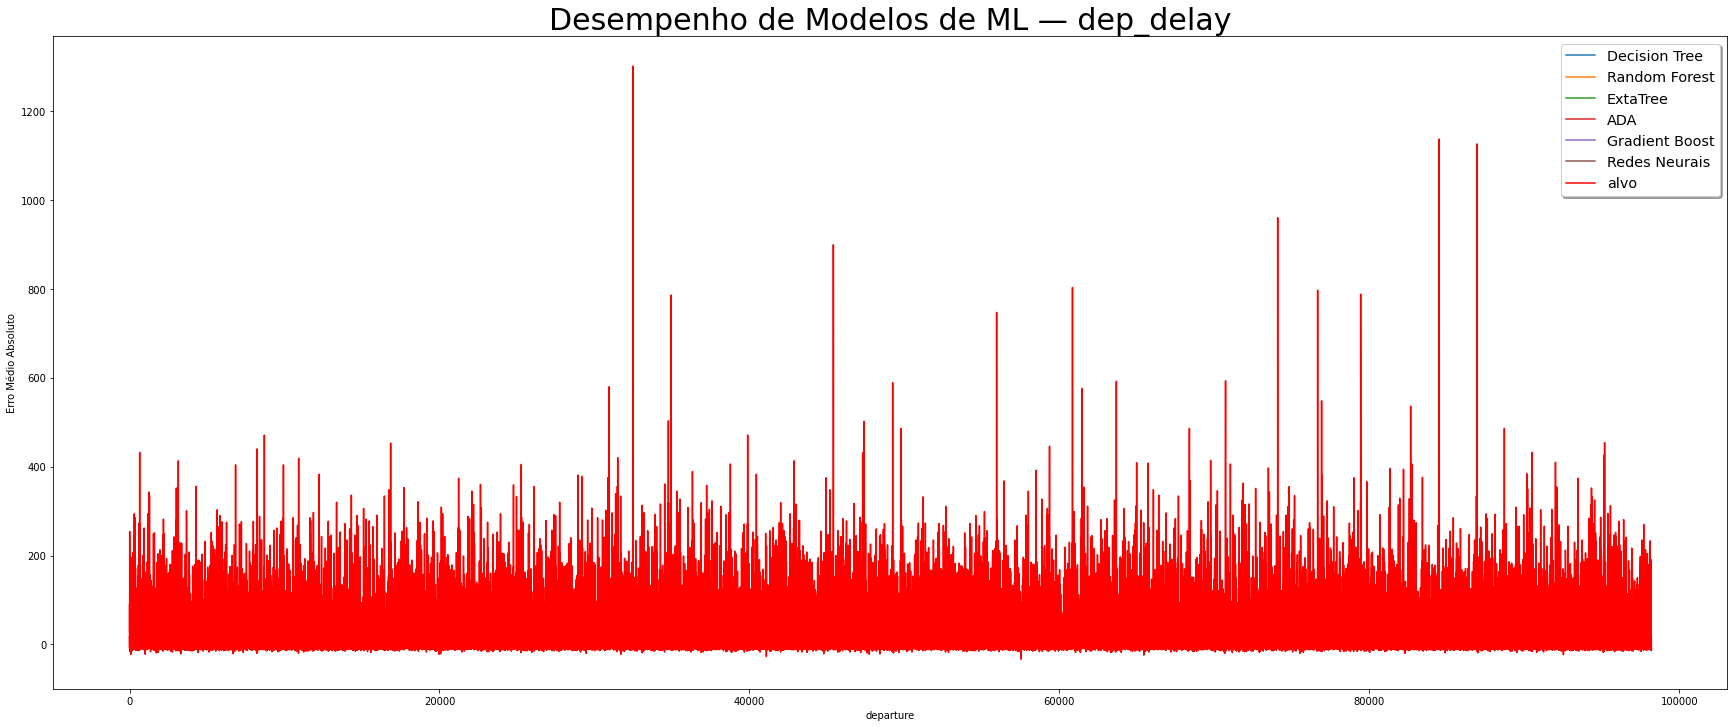

In [ ]:
def machine():
    #Modelos de regressão
    
    DTR = DecisionTreeRegressor(splitter='best', max_depth=5, min_samples_split=2) 
    RFR = RandomForestRegressor(n_estimators=200, max_depth=2) 
    EXT = ExtraTreesRegressor(n_estimators=100, random_state=0) 
    ADA = AdaBoostRegressor(n_estimators=100, random_state=0) 
    GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0) 
    MLP = MLPRegressor() # hidden_layer_sizes=(100, 50, 10), max_iter=1000

    #X/y and Spliting
    X = fly[['arr_delay', 'distance', 'dep_time' , "air_time", "arr_time"]]
    y = fly["dep_delay"] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    #Train
    DTR.fit(X_train,y_train)
    RFR.fit(X_train,y_train)
    EXT.fit(X_train,y_train)
    ADA.fit(X_train,y_train)
    GBR.fit(X_train,y_train)
    MLP.fit(X_train,y_train)
    
    #Preds
    pred_DTR = DTR.predict(X_test)
    pred_RFR = RFR.predict(X_test)
    pred_EXT = EXT.predict(X_test)
    pred_ADA = ADA.predict(X_test)
    pred_GBR = GBR.predict(X_test)
    pred_MLP = MLP.predict(X_test)
    
    #Dic
    preds = {'pred_DTC':pred_DTR,
            'pred_RFC':pred_RFR,
            'pred_EXT': pred_EXT, 
            'pred_ADA': pred_ADA, 
            'pred_GBC':pred_GBR,
            'pred_MLP':pred_MLP}
    
    # Mean Absolute Error — MAE
    MAE_DTR = metrics.mean_absolute_error(y_test, pred_DTR)
    MAE_RFR = metrics.mean_absolute_error(y_test, pred_RFR)
    MAE_EXT = metrics.mean_absolute_error(y_test, pred_EXT)
    MAE_ADA = metrics.mean_absolute_error(y_test, pred_ADA)
    MAE_GBR = metrics.mean_absolute_error(y_test, pred_GBR)
    MAE_MLP = metrics.mean_absolute_error(y_test, pred_MLP)
    
    # Mean Squared Error - — MSE 
    MSE_DTR = metrics.mean_squared_error(y_test, pred_DTR)
    MSE_RFR = metrics.mean_squared_error(y_test, pred_RFR)
    MSE_EXT = metrics.mean_squared_error(y_test, pred_EXT)
    MSE_ADA = metrics.mean_squared_error(y_test, pred_ADA)
    MSE_GBR = metrics.mean_squared_error(y_test, pred_GBR)
    MSE_MLP = metrics.mean_squared_error(y_test, pred_MLP)
    
    # Error ²
    r_DTR = metrics.r2_score(y_test, pred_DTR)
    r_RFR = metrics.r2_score(y_test, pred_RFR)
    r_EXT = metrics.r2_score(y_test, pred_EXT)
    r_ADA = metrics.r2_score(y_test, pred_ADA)
    r_GBR = metrics.r2_score(y_test, pred_GBR)
    r_MLP = metrics.r2_score(y_test, pred_MLP)
    
   

    # Métricas de avaliação do modelo
    
    MAE = {'Decision Tree': MAE_DTR,'Random Forest':MAE_RFR,
              'Extra Tree':MAE_EXT,'Ada Boost': MAE_ADA, 
              'Gradient Boost': MAE_GBR,'Redes Neurais':MAE_MLP}
    
    MSE = {'Decision Tree':MSE_DTR, 'Random Forest':MSE_RFR,
              'Extra Tree':MSE_EXT, 'Ada Boost': MSE_ADA, 
              'Gradient Boost': MSE_GBR,'Redes Neurais':MSE_MLP}
    
    R = {'Decision Tree':r_DTR,  'Random Forest':r_RFR,
              'Extra Tree':r_EXT,'Ada Boost': r_ADA, 
              'Gradient Boost': r_GBR, 'Redes Neurais':r_MLP}
        

    data= MAE,MSE, R
    
    df_metrics = pd.DataFrame.from_dict(data=data)
 


    fig, ax = plt.subplots(figsize=(30, 12))
    ax.plot(r_DTR,label='Decision Tree')
    ax.plot(r_RFR,label='Random Forest')
    ax.plot(r_EXT,label='ExtaTree')
    ax.plot(r_ADA,label='ADA')
    ax.plot(r_GBR,label='Gradient Boost')
    ax.plot(r_MLP,label='Redes Neurais')
    


    ax.plot(y_test.values,label='alvo',color='red')
    ax.set_title('Desempenho de Modelos de ML — dep_delay', fontsize="30")
    ax.set(xlabel='departure', ylabel='Erro Médio Absoluto')
    legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
    
    return df_metrics

machine()